# Pré-Processamento

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Dataset: https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset?resource=download

In [112]:
data = pd.read_csv('synthetic_coffee_health_10000.csv', sep = ',')

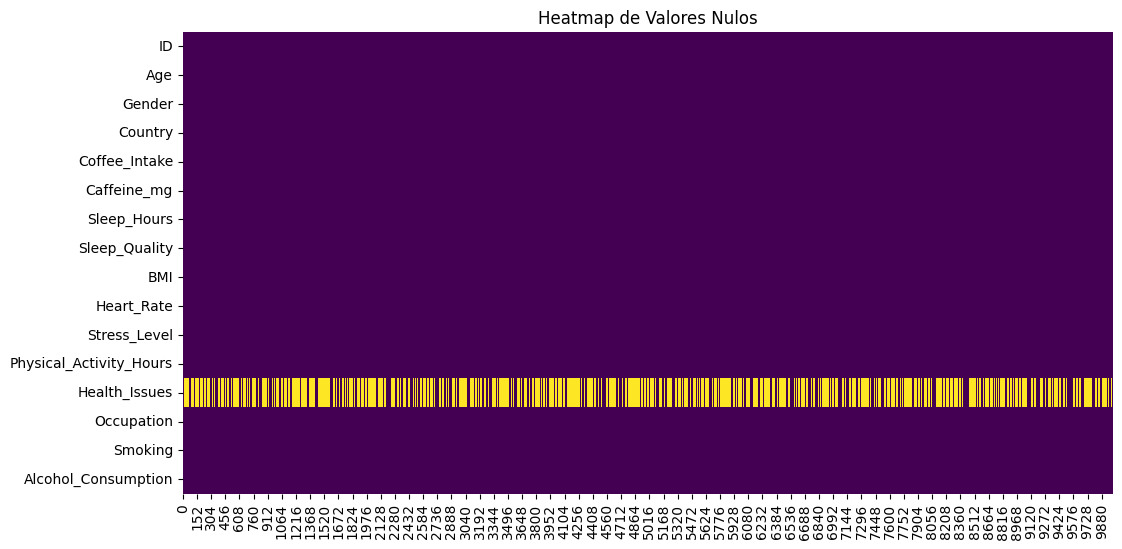

In [113]:
# plotar heatmap de valores nulos
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull().T, cbar=False, cmap='viridis')
plt.title('Heatmap de Valores Nulos')
plt.show()

In [114]:
dataWithoutHealthIssues = data.drop(columns=['Health_Issues'])
dataDroppedNA = data.dropna()
dataWithoutHealthIssues.shape, dataDroppedNA.shape

((10000, 15), (4059, 16))

Se removermos a feature "Health_Issues", a qual é a única que possui valores nulo, teríamos 10000 ocorrências para tentar prever a "Sleep_Quality".

Se mantivermos a feature "Health_Issues", e jogar fora todas as ocorrências em que ela é nula, ainda teremos 4059 ocorrências para prever "Sleep_Quality". O que não me parece ruim.

<Axes: xlabel='Sleep_Quality'>

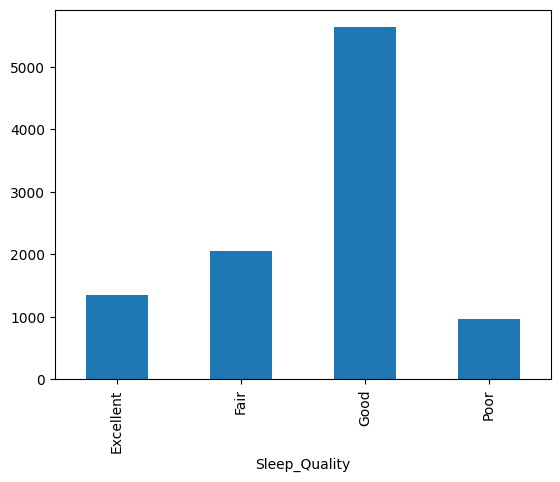

In [115]:
dataWithoutHealthIssues["Sleep_Quality"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Sleep_Quality'>

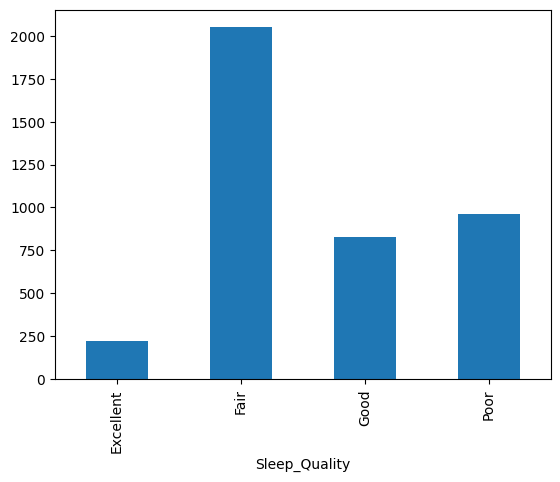

In [116]:
dataDroppedNA["Sleep_Quality"].value_counts().sort_index().plot(kind='bar')

Em ambos os casos, as classes continuam bem desbalanceadas, então não faz muita diferença qual corte escolher. Vamos trabalhar com o dataset com 10000 pra ficar redondo.

Agora, avaliando os valores das colunas:

In [ ]:
dataWithoutHealthIssues["Age"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

In [ ]:
dataWithoutHealthIssues["Gender"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

In [ ]:
dataWithoutHealthIssues["Country"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

In [ ]:
dataWithoutHealthIssues["Coffee_Intake"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

In [ ]:
dataWithoutHealthIssues["Caffeine_mg"].value_counts().sort_index().plot(kind='line', figsize=(12, 3))

In [ ]:
dataWithoutHealthIssues["Sleep_Hours"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))


In [ ]:
dataWithoutHealthIssues["Sleep_Quality"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

In [ ]:
dataWithoutHealthIssues["BMI"].value_counts().sort_index().plot(kind='line', figsize=(12, 3))


In [ ]:
dataWithoutHealthIssues["Heart_Rate"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

In [ ]:
dataWithoutHealthIssues["Stress_Level"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

In [ ]:
dataWithoutHealthIssues["Physical_Activity_Hours"].value_counts().sort_index().plot(kind='line', figsize=(12, 3))

In [ ]:
dataWithoutHealthIssues["Occupation"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

In [ ]:
dataWithoutHealthIssues["Smoking"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

In [ ]:
dataWithoutHealthIssues["Alcohol_Consumption"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

In [ ]:
dataWithoutHealthIssues.head()

## Processamento para o KNN

- Gender: categórica nominal com 3 valores únicos. Aplicar OneHot. 
- Country: categórica nominal com 20 valores únicos. Aplicar OneHot. (Considerar agrupar por continentes, perguntar ao professor).
- Coffee_Intake: numérica contínua. Normalizar. (Conversar com o professor se "cortar" os extremos pode ser bom para o treinamento).
- Caffeine_mg: numérica contínua. Normalizar.
- Sleep_Hours: numérica contínua. Normalizar.
- Sleep_Quality: categórica ordinal e target dos modelos. Só converter para numérica.
- BMI: numérica contínua. Normalizar.
- Heart_Rate: numérica contínua. Normalizar.
- Stress_Level: categórica nominal com 3 valores únicos. Aplicar OneHot.
- Physical_Activity_Hours: numérica contínua. Normalizar.
- Occupation: categórica nominal com 5 valores únicos: Aplicar OneHot.
- Smoking: binária.
- Alcohol_Consumption: binária.

OBS1: vou remover a coluna de país para verificar se melhora as métricas do KNN

In [ ]:
dataEnconded = dataWithoutHealthIssues.copy()

dataEnconded.drop(columns=['Country'], inplace=True)

# OneHot para variáveis categóricas nominais
# dataEnconded = pd.get_dummies(dataEnconded, columns=['Gender', 'Country', 'Stress_Level', 'Occupation'], drop_first=False, dtype=int)
dataEnconded = pd.get_dummies(dataEnconded, columns=['Gender', 'Stress_Level', 'Occupation'], drop_first=False, dtype=int)


# Normalização das variáveis contínuas
scaler = MinMaxScaler()
columnsToNormalize = ['Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']
dataEnconded[columnsToNormalize] = scaler.fit_transform(dataEnconded[columnsToNormalize])

# Conversão manual da coluna Sleep_Quality para valores numéricos
sleepQualityMap = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}

dataEnconded['Sleep_Quality'] = dataEnconded['Sleep_Quality'].map(sleepQualityMap)

dataEnconded.head()

In [ ]:
# divide o dataset em treino, validacao e teste
train, test = train_test_split(dataEnconded, test_size=0.2, stratify=dataEnconded["Sleep_Quality"])
train, validation = train_test_split(train, test_size=0.2, stratify=train["Sleep_Quality"])
train.shape, validation.shape, test.shape

In [ ]:
train.to_csv("trainKNN.csv")
validation.to_csv("validationKNN.csv")
test.to_csv("testKNN.csv")

## Processamento para Naive Bayes

Aqui optamos por converter valores numéricos par intervalor, através de discretizações. 

- Gender: categórica nominal com 3 valores únicos. Fazer nada.
- Country: categórica ordinal com 20 valores únicos. Fazer nada.
- Coffee_Intake: numérica contínua. Discretizar.
- Caffeine_mg: numérica contínua. Discretizar.
- Sleep_Hours: numérica contínua. Discretizar.
- Sleep_Quality: categórica ordinal e target dos modelos. Fazer nada.
- BMI: numérica contínua. Discretizar.
- Heart_Rate: numérica contínua. Discretizar.
- Stress_Level: categórica nominal com 3 valores únicos. Fazer nada.
- Physical_Activity_Hours: numérica contínua. Discretizar.
- Occupation: categórica nominal com 5 valores únicos. Fazer nada.
- Smoking: binária. Fazer nada.
- Alcohol_Consumption: binária. Fazer nada.

In [117]:
dataNB = dataWithoutHealthIssues.copy()

# Colunas a serem discretizadas
columns_to_discretize = [
    'Age',
    'Coffee_Intake',
    'Caffeine_mg',
    'Sleep_Hours',
    'BMI',
    'Heart_Rate',
    'Physical_Activity_Hours'
]

# Discretização usando qcut (quantis) para criar 4 bins para cada coluna
for col in columns_to_discretize:
    dataNB[col] = pd.qcut(dataNB[col], q=4, labels=False, duplicates='drop')

dataNB.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,1,2,Male,Germany,2,2,2,Good,2,3,Low,3,Other,0,0
1,2,1,Male,Germany,0,0,1,Good,0,1,Low,2,Service,0,0
2,3,2,Male,Brazil,3,3,1,Fair,1,0,Medium,2,Office,0,0
3,4,3,Male,Germany,2,2,2,Good,2,1,Low,1,Other,0,0
4,5,1,Female,Spain,2,2,0,Fair,2,2,Medium,2,Student,0,1


In [118]:
# divide o dataset em treino, validacao e teste
train, test = train_test_split(dataEnconded, test_size=0.2, stratify=dataEnconded["Sleep_Quality"])
train, validation = train_test_split(train, test_size=0.2, stratify=train["Sleep_Quality"])
train.shape, validation.shape, test.shape

((6400, 22), (1600, 22), (2000, 22))

In [119]:
train.to_csv("trainNB.csv")
validation.to_csv("validationNB.csv")
test.to_csv("testNB.csv")

# KNN

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import plotly.graph_objects as go

In [ ]:
train = pd.read_csv("trainKNN.csv")
validation = pd.read_csv("validationKNN.csv")
test = pd.read_csv("testKNN.csv")

train.drop(columns=['Unnamed: 0', "ID"], inplace=True)
validation.drop(columns=['Unnamed: 0', "ID"], inplace=True)
test.drop(columns=['Unnamed: 0', "ID"], inplace=True)

In [ ]:
# Avaliação no conjunto de teste
X_test = test.drop(columns=['Sleep_Quality'])
y_test = test['Sleep_Quality']
y_test_pred = knn_final.predict(X_test)

print('Acurácia:', accuracy_score(y_test, y_test_pred))
print('Precisão:', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_test_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_test_pred, average='weighted'))

In [ ]:
# Separa features e target
X_train = train.drop(columns=['Sleep_Quality'])
y_train = train['Sleep_Quality']
X_val = validation.drop(columns=['Sleep_Quality'])
y_val = validation['Sleep_Quality']

## Experimento padrão, setando só o K como parâmetro

In [ ]:
# Teste do cotovelo: varie o número de vizinhos e avalia a acurácia, precisão, recall e f1
k_range = range(1, 100)
scores = []
precisions = []
recalls = []
f1s = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    scores.append(accuracy_score(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred, average='weighted'))
    recalls.append(recall_score(y_val, y_pred, average='weighted'))
    f1s.append(f1_score(y_val, y_pred, average='weighted'))

In [ ]:
# Gráfico interativo do teste do cotovelo
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(k_range), y=scores, mode='lines', name='Acurácia'))
fig.add_trace(go.Scatter(x=list(k_range), y=precisions, mode='lines', name='Precisão'))
fig.add_trace(go.Scatter(x=list(k_range), y=recalls, mode='lines', name='Recall'))
fig.add_trace(go.Scatter(x=list(k_range), y=f1s, mode='lines', name='F1-score'))
fig.update_layout(
    title='Teste do Cotovelo para KNN - Todas Métricas',
    xaxis_title='Número de Vizinhos (k)',
    yaxis_title='Métrica na validação',
    legend_title='Métrica',
    template='plotly_white'
)
fig.show()

In [ ]:
# Printa as métricas de avaliação de um determinado k
k = 5
print("Acurácia: ", scores[k-1])
print("Precisão: ", precisions[k-1])
print("Recall: ", recalls[k-1])
print("F1-score: ", f1s[k-1])

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=k)
knn_final.fit(X_train, y_train)

In [ ]:
# Avaliação no conjunto de teste
X_test = test.drop(columns=['Sleep_Quality'])
y_test = test['Sleep_Quality']
y_test_pred = knn_final.predict(X_test)

print('Acurácia:', accuracy_score(y_test, y_test_pred))
print('Precisão:', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_test_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_test_pred, average='weighted'))

- Como as classes são desbalanceadas, estarei olhando para o f1-score como métrica ideal. 
    - Usando o algoritmo sem a aplicação de pesos e um K = 5, foi obtido um f1 de 0.80. Parece bom. 
        - Acurácia: 0.841
        - Precisão: 0.7919884665305217
        - Recall: 0.841
        - F1-score: 0.8039855637073263 (sem a coluna de países que dobrava o número de features/dimensões, subiu para 0.8147621633227298)

    - Usando o algoritmo com a aplicação de pesos e um K = 5, foi obtido um f1 de 0.80.
        - Acurácia: 0.833
        - Precisão: 0.790764963106682
        - Recall: 0.833
        - F1-score: 0.8012910928757704 (sem a coluna de países que dobrava o número de features/dimensões, se manteve em 0.8067363049789931)
        
- Em todos os casos as métricas da validação e teste estavam muito similares. Logo ele não parece ter overfitado. 

# Naive Bayes

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("trainNB.csv")
validation = pd.read_csv("validationNB.csv")
test = pd.read_csv("testNB.csv")

train.drop(columns=['Unnamed: 0', "ID"], inplace=True)
validation.drop(columns=['Unnamed: 0', "ID"], inplace=True)
test.drop(columns=['Unnamed: 0', "ID"], inplace=True)